<a href="https://colab.research.google.com/github/iam-fern/Generate_multiplication_1X/blob/main/GQtest_data(y_hat)_multi_delta_(3_2)_n60_01.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import os
import statistics as stats
import scipy.stats as ss
from scipy.stats import f_oneway
from scipy import stats
from google.colab import drive
import scipy.stats as stats
import time
import statsmodels.api as sm
from google.colab import files

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
base_path = '/content/drive/My Drive/pattern_multiplication_1X/multiplication_delta_3.2'

In [4]:
os.listdir(base_path)

['data_multi_delta_3.2_n250.csv',
 'data_multi_delta_3.2_n120.csv',
 'data_multi_delta_3.2_n60.csv',
 'data_multi_delta_3.2_n30.csv',
 'data_multi_delta_3.2_n20.csv']

In [5]:
# เรียกใช้ข้อมูลจากไฟล์ โดยผ่านฟังก์ชัน ที่ชื่อว่า read_csv
file_path = os.path.join(base_path, 'data_multi_delta_3.2_n60.csv')
pd.read_csv(file_path)

,rep,index,x1,e,Y,y_hat,e_hat
0,0.0,0.0,97.805360,309.732907,417.538267,-56.217402,473.755669
1,0.0,1.0,92.418117,-1193.549740,-1091.131623,-47.934933,-1043.196690
2,0.0,2.0,41.696946,540.377504,592.074450,30.044933,562.029517
3,0.0,3.0,70.120966,-138.217681,-58.096714,-13.654794,-44.441921
4,0.0,4.0,69.157406,1255.664375,1334.821782,-12.173395,1346.995177
...,...,...,...,...,...,...,...
59995,999.0,55.0,80.764949,-416.761800,-325.996851,205.420093,-531.416945
59996,999.0,56.0,40.169531,437.625020,487.794552,-15.725692,503.520243
59997,999.0,57.0,52.433275,316.184755,378.618030,51.081731,327.536300
59998,999.0,58.0,49.719505,-707.242723,-647.523219,36.298317,-683.821535


In [6]:
df = pd.read_csv(file_path)
df

,rep,index,x1,e,Y,y_hat,e_hat
0,0.0,0.0,97.805360,309.732907,417.538267,-56.217402,473.755669
1,0.0,1.0,92.418117,-1193.549740,-1091.131623,-47.934933,-1043.196690
2,0.0,2.0,41.696946,540.377504,592.074450,30.044933,562.029517
3,0.0,3.0,70.120966,-138.217681,-58.096714,-13.654794,-44.441921
4,0.0,4.0,69.157406,1255.664375,1334.821782,-12.173395,1346.995177
...,...,...,...,...,...,...,...
59995,999.0,55.0,80.764949,-416.761800,-325.996851,205.420093,-531.416945
59996,999.0,56.0,40.169531,437.625020,487.794552,-15.725692,503.520243
59997,999.0,57.0,52.433275,316.184755,378.618030,51.081731,327.536300
59998,999.0,58.0,49.719505,-707.242723,-647.523219,36.298317,-683.821535


In [7]:
df = pd.read_csv(file_path, index_col=['rep', 'index'])
df

x1            e            Y       y_hat        e_hat
rep   index                                                              
0.0   0.0    97.805360   309.732907   417.538267  -56.217402   473.755669
      1.0    92.418117 -1193.549740 -1091.131623  -47.934933 -1043.196690
      2.0    41.696946   540.377504   592.074450   30.044933   562.029517
      3.0    70.120966  -138.217681   -58.096714  -13.654794   -44.441921
      4.0    69.157406  1255.664375  1334.821782  -12.173395  1346.995177
...                ...          ...          ...         ...          ...
999.0 55.0   80.764949  -416.761800  -325.996851  205.420093  -531.416945
      56.0   40.169531   437.625020   487.794552  -15.725692   503.520243
      57.0   52.433275   316.184755   378.618030   51.081731   327.536300
      58.0   49.719505  -707.242723  -647.523219   36.298317  -683.821535
      59.0   45.633584   226.931709   282.565293   14.040036   268.525257

[60000 rows x 5 columns]

In [8]:
# ลบข้อมูลที่มี missing values
table = df.dropna()
table

x1            e            Y       y_hat        e_hat
rep   index                                                              
0.0   0.0    97.805360   309.732907   417.538267  -56.217402   473.755669
      1.0    92.418117 -1193.549740 -1091.131623  -47.934933 -1043.196690
      2.0    41.696946   540.377504   592.074450   30.044933   562.029517
      3.0    70.120966  -138.217681   -58.096714  -13.654794   -44.441921
      4.0    69.157406  1255.664375  1334.821782  -12.173395  1346.995177
...                ...          ...          ...         ...          ...
999.0 55.0   80.764949  -416.761800  -325.996851  205.420093  -531.416945
      56.0   40.169531   437.625020   487.794552  -15.725692   503.520243
      57.0   52.433275   316.184755   378.618030   51.081731   327.536300
      58.0   49.719505  -707.242723  -647.523219   36.298317  -683.821535
      59.0   45.633584   226.931709   282.565293   14.040036   268.525257

[60000 rows x 5 columns]

In [9]:
table.reset_index(inplace=True)
table

,rep,index,x1,e,Y,y_hat,e_hat
0,0.0,0.0,97.805360,309.732907,417.538267,-56.217402,473.755669
1,0.0,1.0,92.418117,-1193.549740,-1091.131623,-47.934933,-1043.196690
2,0.0,2.0,41.696946,540.377504,592.074450,30.044933,562.029517
3,0.0,3.0,70.120966,-138.217681,-58.096714,-13.654794,-44.441921
4,0.0,4.0,69.157406,1255.664375,1334.821782,-12.173395,1346.995177
...,...,...,...,...,...,...,...
59995,999.0,55.0,80.764949,-416.761800,-325.996851,205.420093,-531.416945
59996,999.0,56.0,40.169531,437.625020,487.794552,-15.725692,503.520243
59997,999.0,57.0,52.433275,316.184755,378.618030,51.081731,327.536300
59998,999.0,58.0,49.719505,-707.242723,-647.523219,36.298317,-683.821535


In [10]:
table.set_index(['rep', 'index'], inplace=True)

In [11]:
table

x1            e            Y       y_hat        e_hat
rep   index                                                              
0.0   0.0    97.805360   309.732907   417.538267  -56.217402   473.755669
      1.0    92.418117 -1193.549740 -1091.131623  -47.934933 -1043.196690
      2.0    41.696946   540.377504   592.074450   30.044933   562.029517
      3.0    70.120966  -138.217681   -58.096714  -13.654794   -44.441921
      4.0    69.157406  1255.664375  1334.821782  -12.173395  1346.995177
...                ...          ...          ...         ...          ...
999.0 55.0   80.764949  -416.761800  -325.996851  205.420093  -531.416945
      56.0   40.169531   437.625020   487.794552  -15.725692   503.520243
      57.0   52.433275   316.184755   378.618030   51.081731   327.536300
      58.0   49.719505  -707.242723  -647.523219   36.298317  -683.821535
      59.0   45.633584   226.931709   282.565293   14.040036   268.525257

[60000 rows x 5 columns]

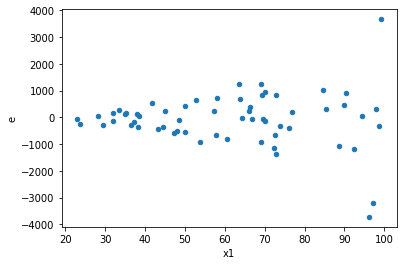

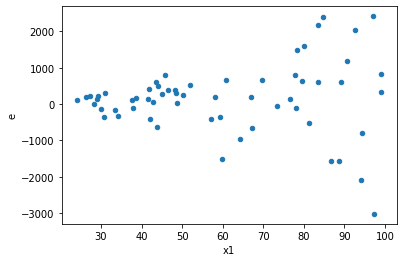

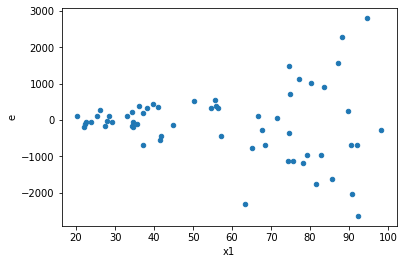

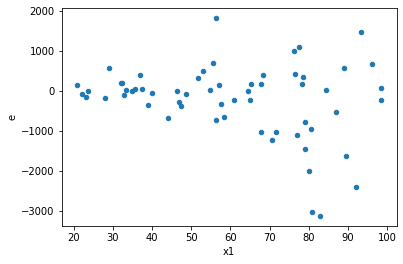

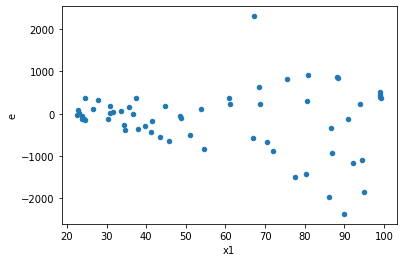

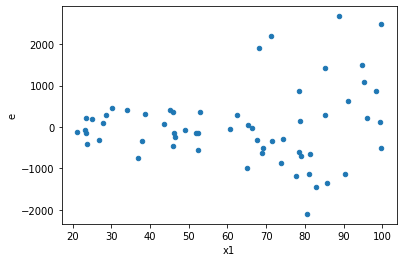

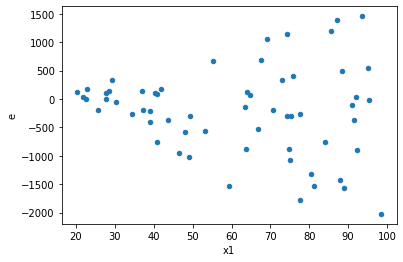

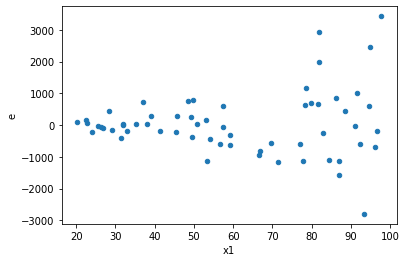

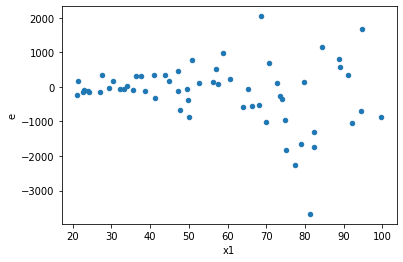

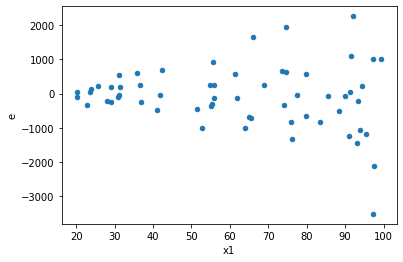

In [12]:
tablenew0 = table.loc[0.0]
tablenew1 = table.loc[1.0]
tablenew2 = table.loc[2.0]
tablenew3 = table.loc[3.0]
tablenew4 = table.loc[4.0]
tablenew5 = table.loc[5.0]
tablenew6 = table.loc[6.0]
tablenew7 = table.loc[7.0]
tablenew8 = table.loc[8.0]
tablenew9 = table.loc[9.0]
tablenew0.plot(x ='x1', y='e', kind = 'scatter')
tablenew1.plot(x ='x1', y='e', kind = 'scatter')
tablenew2.plot(x ='x1', y='e', kind = 'scatter')
tablenew3.plot(x ='x1', y='e', kind = 'scatter')
tablenew4.plot(x ='x1', y='e', kind = 'scatter')
tablenew5.plot(x ='x1', y='e', kind = 'scatter')
tablenew6.plot(x ='x1', y='e', kind = 'scatter')
tablenew7.plot(x ='x1', y='e', kind = 'scatter')
tablenew8.plot(x ='x1', y='e', kind = 'scatter')
tablenew9.plot(x ='x1', y='e', kind = 'scatter')

In [13]:
def get_result(run_replicate, percent_data):
    new_table = table.loc[run_replicate]

    # เรียง data จากน้อยไปมากตาม y_hat
    new_table_sort = new_table.sort_values('y_hat')
    new_table_sort.reset_index(inplace=True)
    new_table_sort.drop(['index'], axis=1, inplace=True)

    # แบ่งข้อมูลกลุ่มที่ 1
    table1 = new_table_sort.iloc[:int(percent_data*new_table_sort.shape[0]) , :]
    y = table1['Y']
    x = table1[['x1']]
    # add constant to predictor variable
    x = sm.add_constant(x)
    # fit linear regression model
    model1 = sm.OLS(y, x).fit()

    # หาค่า df กลุ่ม 1
    DF1 = model1.df_resid + 1
    SSE1 = model1.ssr
    MSE1 = SSE1/DF1

    # แบ่งข้อมูลกลุ่มที่ 2
    table2 = new_table_sort.iloc[int((1-percent_data)*new_table_sort.shape[0]): , :]

    y = table2['Y']
    x = table2[['x1']]
    x = sm.add_constant(x)
    model2 = sm.OLS(y, x).fit()
    #print(model.summary())

    # หาค่า df กลุ่ม 2
    DF2 = model2.df_resid + 1
    SSE2 = model2.ssr
    MSE2 = SSE2/DF2

    # ค่าสถิติทดสอบ
    GQ_test = (SSE2/DF2) / (SSE1/DF1)

    df2 = DF2
    df1 = DF1

    # คำนวณค่า p-value
    # pdf(x, dfn, dfd, loc=0, scale=1) : Probability density function
    two_tailed = 2.0*(1.0-(ss.f.cdf(GQ_test, df2, df1)))
    p_greater = ss.f.cdf(GQ_test, df2, df1)
    p_less = 1.0-ss.f.cdf(GQ_test, df2, df1)

    return df1, df2, SSE1, SSE2, MSE1, MSE2, GQ_test, two_tailed, p_greater, p_less

# สร้าง list ของ replicates
list_replicate=list({i[0] for i in table.index})
list_replicate.sort()

# สร้าง list เพื่อเก็บค่า ทุกรอบที่ run
list_df1=[]
list_df2=[]
list_SSE1=[]
list_SSE2=[]
list_MSE1=[]
list_MSE2=[]
list_GQ_test=[]
list_two_tailed=[]
list_p_greater=[]
list_p_less=[]

# กำหนด % การแบ่งข้อมูล
percent_data=0.4

# ใช้ for loop สำหรับการ run ทุก replicates
for run_replicate in list_replicate:
    df1, df2, SSE1, SSE2, MSE1, MSE2, GQ_test, two_tailed, p_greater, p_less=get_result(run_replicate, percent_data)
    list_df1.append(df1)
    list_SSE1.append(SSE1)
    list_df2.append(df2)
    list_SSE2.append(SSE2)
    list_MSE1.append(MSE1)
    list_MSE2.append(MSE2)
    list_GQ_test.append(GQ_test)
    list_two_tailed.append(two_tailed)
    list_p_greater.append(p_greater)
    list_p_less.append(p_less)

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [14]:
# สร้างตารางผลลัพธ์
alpha = 0.01
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test":list_GQ_test, "two_tailed":list_two_tailed, "greater":list_p_greater, "less":list_p_less})
result.set_index(['Replicate'], inplace=True)
result=result[(result["two_tailed"]<=1) & (result["greater"]<=1) & (result["less"]<=1)]
result["Result_test"]=result["two_tailed"].apply(lambda p_value: 'Reject001=0 : Heteroscedasticity' 
                                                 if p_value < alpha else 'Reject001=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")

result.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test,two_tailed,greater,less,Result_test
Replicate,,,,,,,,,,,
1.0,23.0,23.0,2458482.4609575365,46521534.89117237,106890.54178076246,2022675.4300509726,18.922866292506733,9.599314676478343e-10,0.9999999995200343,4.799657338239172e-10,Reject001=0 : Heteroscedasticity
5.0,23.0,23.0,2513398.9621875784,26980351.412736487,109278.21574728601,1173058.7570754995,10.7346075249644,2.9504760656884343e-07,0.9999998524761967,1.4752380328442172e-07,Reject001=0 : Heteroscedasticity
7.0,23.0,23.0,2317716.886387411,50210223.11183309,100770.2994081483,2183053.1787753515,21.6636567678872,2.317570579890571e-10,0.9999999998841215,1.1587852899452855e-10,Reject001=0 : Heteroscedasticity
11.0,23.0,23.0,2889158.434477376,29435862.439234953,125615.584107712,1279820.1060536937,10.188386378526745,4.887561044775168e-07,0.9999997556219478,2.443780522387584e-07,Reject001=0 : Heteroscedasticity
13.0,23.0,23.0,2153870.6926349294,45467154.19476209,93646.55185369258,1976832.7910766124,21.109509661018702,3.046793928263014e-10,0.9999999998476603,1.523396964131507e-10,Reject001=0 : Heteroscedasticity
14.0,23.0,23.0,1777266.6341405518,18955868.78555694,77272.46235393704,824168.2080676929,10.665742788067133,3.1405888600843923e-07,0.999999842970557,1.5702944300421962e-07,Reject001=0 : Heteroscedasticity
16.0,23.0,23.0,2869156.6970239,68197620.14949574,124745.94334886523,2965113.919543293,23.76922118622357,8.662937034387141e-11,0.9999999999566853,4.331468517193571e-11,Reject001=0 : Heteroscedasticity
18.0,23.0,23.0,1887145.5911605225,28003386.54767608,82049.80831132707,1217538.5455511338,14.839017550551075,1.1771731145415743e-08,0.9999999941141344,5.885865572707871e-09,Reject001=0 : Heteroscedasticity
19.0,23.0,23.0,1733397.1125899474,30956780.18447498,75365.09185173684,1345946.9645423903,17.85902373993288,1.7534182994438652e-09,0.9999999991232909,8.767091497219326e-10,Reject001=0 : Heteroscedasticity


In [15]:
# สร้างตารางผลลัพธ์
alpha = 0.01
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test":list_GQ_test, "two_tailed":list_two_tailed, "greater":list_p_greater, "less":list_p_less})
result.set_index(['Replicate'], inplace=True)

result['two_tailed_new']=result[["two_tailed","greater","less"]].apply(lambda value: value[0] if value[0]<0.5 else (2*value[1] if value[1]<0.5 else 2*value[2]) , axis=1)
result["Result_test"]=result["two_tailed_new"].apply(lambda p_value: 'Reject001=0 : Heteroscedasticity' 
                                                                  if p_value < alpha else 'Reject001=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")
result_show=result.drop(columns=["two_tailed", "greater", "less"])
result_show.astype(str)

#result.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test,two_tailed_new,Result_test
Replicate,,,,,,,,,
0.0,23.0,23.0,49127377.71705086,2705541.5556248613,2135972.9442196027,117632.24154890701,0.055071971706029746,1.4755407960557922e-09,Reject001=0 : Heteroscedasticity
1.0,23.0,23.0,2458482.4609575365,46521534.89117237,106890.54178076246,2022675.4300509726,18.922866292506733,9.599314676478343e-10,Reject001=0 : Heteroscedasticity
2.0,23.0,23.0,44811238.17297681,1714909.4125149886,1948314.7031729047,74561.2788049995,0.03826962794233068,3.148916676489415e-11,Reject001=0 : Heteroscedasticity
3.0,23.0,23.0,37370115.17226153,1835287.8176056365,1624787.6161852838,79795.12250459289,0.04911110948268909,4.453582151121631e-10,Reject001=0 : Heteroscedasticity
4.0,23.0,23.0,23821381.911288437,1027601.2269423025,1035712.2570125407,44678.31421488272,0.04313776718618262,1.1306405082460303e-10,Reject001=0 : Heteroscedasticity
5.0,23.0,23.0,2513398.9621875784,26980351.412736487,109278.21574728601,1173058.7570754995,10.7346075249644,2.9504760656884343e-07,Reject001=0 : Heteroscedasticity
6.0,23.0,23.0,24328313.47358774,1785530.054630027,1057752.759721206,77631.74150565335,0.0733930881221382,2.79079371003212e-08,Reject001=0 : Heteroscedasticity
7.0,23.0,23.0,2317716.886387411,50210223.11183309,100770.2994081483,2183053.1787753515,21.6636567678872,2.317570579890571e-10,Reject001=0 : Heteroscedasticity
8.0,23.0,23.0,39114445.65401524,1582725.2970455245,1700628.0719137061,68814.14334980541,0.040463958278878276,5.7183481941721575e-11,Reject001=0 : Heteroscedasticity


In [16]:
result_show['Result_test'].value_counts()

Reject001=0 : Heteroscedasticity    990
Reject001=1 : Homoscedasticity       10
Name: Result_test, dtype: int64